# Numerical Methods

## Numerical integration

### Exercise solutions

In [1]:
# some imports we will make at the start of every notebook
# later notebooks may add to this with specific SciPy modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## <span style="color:blue">Exercise 1: Midpoint rule convergence plot</span>

Plot the log-log plot mentioned above.

In [2]:
def midpoint_rule(a, b, function, number_intervals=10):
    """ Our implementation of the midpoint quadrature rule.
    
    a and b are the end points for our interval of interest.
    
    'function' is the function of x \in [a,b] which we can evaluate as needed.
    
    number_intervals is the number of subintervals/bins we split [a,b] into.
    
    Returns the integral of function(x) over [a,b].
    """
    interval_size = (b - a)/number_intervals

    # Some examples of some asserts which might be useful here - 
    # you should get into the habit of using these sorts of checks as much as is possible/sensible.
    assert interval_size > 0
    assert type(number_intervals) == int
    
    # Initialise to zero the variable that will contain the cumulative sum of all the areas
    I_M = 0.0
    
    # Find the first midpoint -- i.e. the centre point of the base of the first rectangle
    mid = a + (interval_size/2.0)
    # and loop until we get past b, creating and summing the area of each rectangle
    while (mid < b):
        # Find the area of the current rectangle and add it to the running total
        # this involves an evaluation of the function at the subinterval midpoint
        I_M += interval_size * function(mid)
        # Move the midpoint up to the next centre of the interval
        mid += interval_size

    # Return our running total result
    return I_M

# check the function runs and agrees with our first version used to generate the schematic plot of the method above:
print('midpoint_rule(0, np.pi, np.sin, number_intervals=5) = ', midpoint_rule(0, np.pi, np.sin, number_intervals=5))

midpoint_rule(0, np.pi, np.sin, number_intervals=5) =  2.033281476926104


The exact area found by direct integration = 2
Area 1    rectangle(s) = 3.141592654 (error = 1.141592654e+00)
Area 2    rectangle(s) = 2.221441469 (error = 2.214414691e-01)
Area 4    rectangle(s) = 2.052344306 (error = 5.234430595e-02)
Area 8    rectangle(s) = 2.012909086 (error = 1.290908560e-02)
Area 16   rectangle(s) = 2.003216378 (error = 3.216378168e-03)
Area 32   rectangle(s) = 2.000803416 (error = 8.034163099e-04)
Area 100  rectangle(s) = 2.000082249 (error = 8.224907099e-05)
Area 1000 rectangle(s) = 2.000000822 (error = 8.224672938e-07)


Text(0.5, 1.0, 'Convergence plot when integrating $\\sin$ with the midpoint rule')

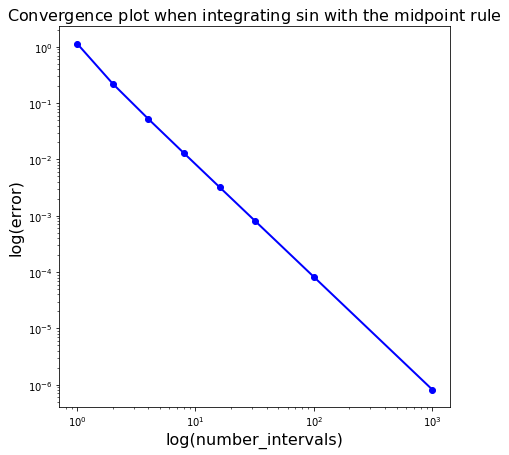

In [3]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# Now let's test the midpoint function.
print('The exact area found by direct integration = 2')

# create a list of interval sizes to test 
interval_sizes_M = [1, 2, 4, 8, 16, 32, 100, 1000]

# initialise an array to store the errors
errors_M = np.zeros_like(interval_sizes_M, dtype='float64')

# loop over the list of interval sizes, compute and store errors
for (i, number_intervals) in enumerate(interval_sizes_M):
    area = midpoint_rule(0, np.pi, f, number_intervals)
    errors_M[i] = abs(area-2)
    print('Area {:<4d} rectangle(s) = {:.9f} (error = {:.9e})'.format(
        number_intervals, area, errors_M[i]))

# plot how the errors vary with interval size
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_M, errors_M, 'bo-', lw=2)
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Convergence plot when integrating $\sin$ with the midpoint rule', fontsize=16)


## <span style="color:blue">Exercise 2: Complete the implementation of the trapezoid rule below</span>

In [4]:
def trapezoidal_rule(a, b, function, number_intervals=10):
    """Our implementation of the trapezoidal quadrature rule.
    
    Note that as discussed in the lecture this version of the implementation 
    performs redundant function evaluations - see the composite implementation 
    in the homework for a more efficient version.
    """
    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_T = 0.0

    # Loop to create each trapezoid
    # note this function takes a slightly different approach to Midpoint 
    # (a for loop rather than a while loop) to achieve the same thing
    for i in range(number_intervals):
        # Set the start of this interval 
        this_bin_start = a + (interval_size * i)
        # Find the area of the current trapezoid and add it to the running total
        I_T += interval_size * \
                (function(this_bin_start)+function(this_bin_start+interval_size))/2.0

    # Return our running total result
    return I_T

and test the function in a similar way:

In [5]:
print("The exact area found by direct integration = 2")
for i in (1, 2, 10, 100, 1000):
    area = trapezoidal_rule(0, np.pi, np.sin, i)
    print("Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2)))

The exact area found by direct integration = 2
Area 1 rectangle(s) = 1.92367e-16 (error=2)
Area 2 rectangle(s) = 1.5708 (error=0.429204)
Area 10 rectangle(s) = 1.98352 (error=0.0164765)
Area 100 rectangle(s) = 1.99984 (error=0.000164496)
Area 1000 rectangle(s) = 2 (error=1.64493e-06)


You should have found the following errors:

`The area found by direct integration = 2`

`Area 1 rectangle(s) = 1.92367e-16 (error=2)`

`Area 2 rectangle(s) = 1.5708 (error=0.429204)`

`Area 10 rectangle(s) = 1.98352 (error=0.0164765)`

`Area 100 rectangle(s) = 1.99984 (error=0.000164496)`

`Area 1000 rectangle(s) = 2 (error=1.64493e-06)`

The exact area found by direct integration = 2
Area 1    trapezoid(s) = 0.0000000000000002 (error = 1.999999999999999778e+00)
Area 2    trapezoid(s) = 1.5707963267948968 (error = 4.292036732051032200e-01)
Area 4    trapezoid(s) = 1.8961188979370398 (error = 1.038811020629601956e-01)
Area 8    trapezoid(s) = 1.9742316019455510 (error = 2.576839805444897102e-02)
Area 16   trapezoid(s) = 1.9935703437723391 (error = 6.429656227660895951e-03)
Area 32   trapezoid(s) = 1.9983933609701445 (error = 1.606639029855472245e-03)
Area 100  trapezoid(s) = 1.9998355038874440 (error = 1.644961125559785131e-04)
Area 1000 trapezoid(s) = 1.9999983550656619 (error = 1.644934338074222069e-06)

Verificaton check: 
These are the corresponding values computed using Scipy's trapezoidal function and the difference with our computed result
0.0000000000000002, 0.0000000000000000e+00
1.5707963267948968, 0.0000000000000000e+00
1.8961188979370398, 0.0000000000000000e+00
1.9742316019455508, 2.2204460492503131e-16
1.993

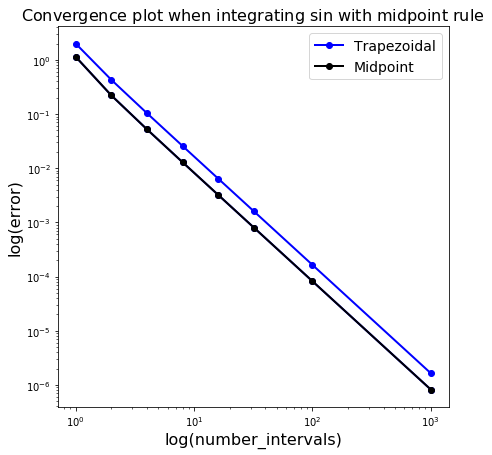

In [6]:
import scipy.integrate as si

def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# Now let's test the trapezoidal function.
print("The exact area found by direct integration = 2")
interval_sizes_T = [1, 2, 4, 8, 16, 32, 100, 1000]
areas_T = np.zeros_like(interval_sizes_T, dtype='float64')
errors_T = np.zeros_like(interval_sizes_T, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_T):
    areas_T[i] = trapezoidal_rule(0, np.pi, f, number_intervals)
    errors_T[i] = abs(areas_T[i]-2)
    print('Area {:<4d} trapezoid(s) = {:.16f} (error = {:.18e})'.format(
        number_intervals, areas_T[i], errors_T[i]))

print("\nVerificaton check: \nThese are the corresponding values computed using Scipy's"
      " trapezoidal function and the difference with our computed result")
for (i, number_intervals) in enumerate(interval_sizes_T):
    area_scipy_trap = si.trapz(f(np.linspace(0, np.pi, number_intervals+1)), 
                               np.linspace(0, np.pi, number_intervals+1))
    print('{0:.16f}, {1:.16e}'.format(area_scipy_trap, abs(area_scipy_trap - areas_T[i])))

# plot
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_M, errors_M, 'bo-', lw=2)
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Convergence plot when integrating $\sin$ with midpoint rule', fontsize=16)
ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2, label='Trapezoidal')
ax1.loglog(interval_sizes_M, errors_M, 'ko-', lw=2, label='Midpoint')
ax1.legend(loc='best', fontsize=14)

## <span style="color:blue">Exercise 3: Implementing Simpson's rule</span>

Complete an implementation of Simpson's rule and test it on our sine function.

In [7]:
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

In [8]:
print("The area found by direct integration = 2")
for i in (1, 2, 10, 100, 1000):
    area = simpsons_rule(0, np.pi, np.sin, i)
    print("Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2)))

The area found by direct integration = 2
Area 1 rectangle(s) = 2.0944 (error=0.0943951)
Area 2 rectangle(s) = 2.00456 (error=0.00455975)
Area 10 rectangle(s) = 2.00001 (error=6.78444e-06)
Area 100 rectangle(s) = 2 (error=6.76471e-10)
Area 1000 rectangle(s) = 2 (error=6.79456e-14)


For this simple function you should find far smaller errors, and which drop much more rapidly with smaller $h$ (or more sub-intervals).


This is a slight improvement for a simple function like $\sin$, but will be much more of an improvement for functions which oscillate more, in a relative sense comapred to the size of our bins. 

The exact area found by direct integration = 2
Area 1    for Simpson = 2.0943951023931953 (error = 9.439510239e-02)
Area 2    for Simpson = 2.0045597549844207 (error = 4.559754984e-03)
Area 4    for Simpson = 2.0002691699483877 (error = 2.691699484e-04)
Area 8    for Simpson = 2.0000165910479355 (error = 1.659104794e-05)
Area 16   for Simpson = 2.0000010333694127 (error = 1.033369413e-06)
Area 32   for Simpson = 2.0000000645300018 (error = 6.453000179e-08)
Area 100  for Simpson = 2.0000000006764709 (error = 6.764708793e-10)
Area 1000 for Simpson = 2.0000000000000679 (error = 6.794564911e-14)

Verificaton check: These are the corresponding values computed using SciPy  (BUT read the comment in the code above!)
2.0943951023931953, 0.0000000000000000e+00
2.0045597549844207, 0.0000000000000000e+00
2.0002691699483877, 0.0000000000000000e+00
2.0000165910479355, 0.0000000000000000e+00
2.0000010333694132, 4.4408920985006262e-16
2.0000000645300018, 0.0000000000000000e+00
2.0000000006764718, 8.88

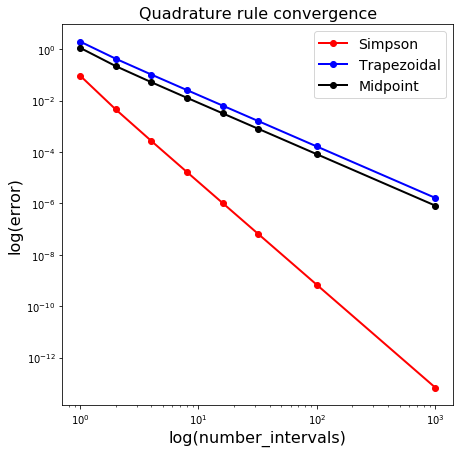

In [9]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# Now let's test the Simpson's rule function.
print("The exact area found by direct integration = 2")
interval_sizes_S = [1, 2, 4, 8, 16, 32, 100, 1000]
errors_S = np.zeros_like(interval_sizes_S, dtype='float64')
areas_S = np.zeros_like(interval_sizes_S, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_S):
    areas_S[i] = simpsons_rule(0, np.pi, f, number_intervals)
    errors_S[i] = abs(areas_S[i] - 2)
    print('Area {:<4d} for Simpson = {:.16f} (error = {:.9e})'.format(
        number_intervals, areas_S[i], errors_S[i]))
    
    
print('\nVerificaton check: These are the corresponding values computed using SciPy' 
      '  (BUT read the comment in the code above!)')
# note that since our function above takes the function and can evaluate it wherever it likes, 
# it essentially doubles the number of intervals by evaluating the function at the mid points.
# The scipy function takes in discrete data points, and hence fits a polynomial across two
# intervals. 
# Therefore to get the same values we need to explicitly double the number of intervals in the
# function call: 
# instead of passing it 'number_intervals' points, we pass it '2*number_intervals + 1' points
# Also the SciPy implementation obviously needs an even number of intervals (equivalently an ODD
# number of data points)
# Note we didn't have this issue with the SciPy version of trapezoidal as both the function and
# data point passing versions of the method only need two (end) points per interval.
for (i, number_intervals) in enumerate(interval_sizes_S):
    area_scipy_simpson = si.simps(f(np.linspace(0, np.pi, 2*number_intervals + 1)),
                   np.linspace(0, np.pi, 2*number_intervals + 1))
    print('{0:.16f}, {1:.16e}'.format(area_scipy_simpson, abs(area_scipy_simpson - areas_S[i])))
    

# plot
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_S, errors_S, 'ro-', lw=2, label='Simpson')
ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2, label='Trapezoidal')
ax1.loglog(interval_sizes_M, errors_M, 'ko-', lw=2, label='Midpoint')
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Quadrature rule convergence', fontsize=16)
ax1.legend(loc='best', fontsize=14)


## <span style="color:blue">Exercise 4: Implementing Weddle's rule</span>

Write a function which implements Weddle's rule using appropriate calls to the simpsons and simpsons_composite functions written above.

In [10]:
def simpsons_composite_rule(a, b, function, number_intervals=10):
    """Function to evaluate the composite Simpson's rule only using
    function evaluations at (number_intervals + 1) points.
    
    This implementation requires that the number of subintervals (number_intervals) be even
    """
    assert number_intervals % 2 == 0, "number_intervals is not even"

    interval_size = (b - a) / number_intervals
    # start with the two end member values
    I_cS2 = function(a) + function(b)

    # add in those terms with a coefficient of 4
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i * interval_size)

    # and those terms with a coefficient of 2
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a + i * interval_size)

    return I_cS2 * (interval_size / 3.0)

In [11]:
def weddles_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Weddle's quadrature rule using
    appropriate calls to the composite_simpson function
    """
    S = simpsons_composite_rule(a, b, function, number_intervals)
    S2 = simpsons_composite_rule(a, b, function, number_intervals*2)

    return S2 + (S2 - S)/15.

In [12]:
print("The area found by direct integration = 2")
for i in (2, 10, 100, 1000):
    area = weddles_rule(0, np.pi, np.sin, i)
    print("Area with %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2)))

The area found by direct integration = 2
Area with 2 rectangle(s) = 1.99857 (error=0.00142927)
Area with 10 rectangle(s) = 2 (error=6.44164e-08)
Area with 100 rectangle(s) = 2 (error=6.23945e-14)
Area with 1000 rectangle(s) = 2 (error=8.88178e-16)


You can see our final rule is much more accurate for fewer required bins. Indeed we are down at the limits where round-off errors are affecting our results.

The exact area found by direct integration = 2
Area 2    interval(s), 8    function evaluations for Weddle = 1.9985707318238357 (error = 1.4292681761642889e-03)
Area 4    interval(s), 14   function evaluations for Weddle = 1.9999831309459859 (error = 1.6869054014101437e-05)
Area 8    interval(s), 26   function evaluations for Weddle = 1.9999997524545721 (error = 2.4754542793381518e-07)
Area 16   interval(s), 50   function evaluations for Weddle = 1.9999999961908446 (error = 3.8091554355190738e-09)
Area 32   interval(s), 98   function evaluations for Weddle = 1.9999999999407072 (error = 5.9292792897736035e-11)
Area 100  interval(s), 302  function evaluations for Weddle = 1.9999999999999376 (error = 6.2394533983933798e-14)
Area 1000 interval(s), 3002 function evaluations for Weddle = 1.9999999999999991 (error = 8.8817841970012523e-16)


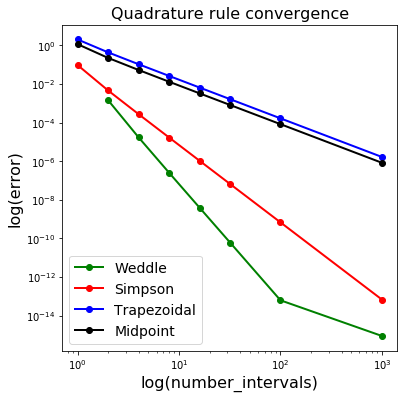

In [13]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# Now let's test the Weddle's rule function.
print("The exact area found by direct integration = 2")
interval_sizes_W = [2, 4, 8, 16, 32, 100, 1000]
errors_W = np.zeros_like(interval_sizes_W, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_W):
    area = weddles_rule(0, np.pi, f, number_intervals)
    errors_W[i] = abs(area-2)
    print('Area {0:<4d} interval(s), {1:<4d} function evaluations for Weddle = {2:.16f} (error = {3:.16e})'.format(
        number_intervals, ((number_intervals+1)+(2*number_intervals+1)), area, errors_W[i]))

# plot
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_W, errors_W, 'go-', lw=2, label='Weddle')
# need to run the other quadrature rules to allow the following 3 lines
ax1.loglog(interval_sizes_S, errors_S, 'ro-', lw=2, label='Simpson')
ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2, label='Trapezoidal')
ax1.loglog(interval_sizes_M, errors_M, 'ko-', lw=2, label='Midpoint')
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Quadrature rule convergence', fontsize=16)
ax1.legend(loc='best', fontsize=14)


# this generates the image seen in lecture
#fig.savefig('weddle_convergence.png', dpi=600, format='png', facecolor='w', edgecolor='w')